# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/focraniv/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/focraniv/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/focraniv/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/focraniv/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/focraniv/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


In [2]:
# Read your api key environment variable
load_dotenv()
news_api_key = os.getenv('NEWS_API_KEY')

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(news_api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q='Bitcoin', language='en', sort_by='relevancy')
print(f"Total Bitcoin articles: {bitcoin_news['totalResults']}")

Total Bitcoin articles: 8716


In [5]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q='Ethereum', language='en', sort_by='relevancy')
print(f"Total Enthereum articles: {ethereum_news['totalResults']}")

Total Enthereum articles: 4724


In [6]:
# Create the Bitcoin sentiment scores DataFrame
def sentiment_scores_df(news_headlines):
    sentiments = []
    for article in news_headlines['articles']:
        try:
            text = article['content']
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment['compound']
            negative = sentiment['neg']
            neutral = sentiment['neu']
            positive = sentiment['neg']
            sentiments.append({
                'Compound': compound,
                'Negative': negative,
                'Neutral': neutral,
                'Positive': positive,
                'Text': text
                })

        except AttributeError:
            pass
   
    sentiments_df = pd.DataFrame(sentiments)
    return sentiments_df

bitcoin_df = sentiment_scores_df(bitcoin_news)
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,Text
0,-0.4404,0.081,0.919,0.081,Its set to open later this year\r\nIf you buy ...
1,0.4019,0.000,0.912,0.000,Wikipedia editors have voted in favor of dropp...
2,-0.2732,0.057,0.943,0.057,"You might have heard of crypto Twitter, the co..."
3,-0.4404,0.088,0.912,0.088,The wallet will have USB-C and a fingerprint r...
4,0.0000,0.000,1.000,0.000,German authorities have seized $25.2 million U...


In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_df = sentiment_scores_df(ethereum_news)
ethereum_df.head()

,Compound,Negative,Neutral,Positive,Text
0,-0.7845,0.231,0.681,0.231,The US Department of Treasury says Lazarus is ...
1,0.1027,0.071,0.844,0.071,"18 with 15 posters participating, including st..."
2,-0.4215,0.098,0.851,0.098,"This week, the cryptocurrency network Ronin di..."
3,0.7351,0.000,0.812,0.000,"Opera launched its dedicated ""Crypto Browser"" ..."
4,0.0000,0.000,1.000,0.000,April 5 (Reuters) - Ethereum blockchain scalin...


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.019495,0.046450,0.895400,0.046450
std,0.402266,0.040399,0.062096,0.040399
min,-0.542300,0.000000,0.775000,0.000000
25%,-0.310275,0.000000,0.848500,0.000000
50%,0.000000,0.063000,0.912000,0.063000
75%,0.355075,0.078750,0.927250,0.078750
max,0.735100,0.104000,1.000000,0.104000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.088885,0.057000,0.849350,0.057000
std,0.515929,0.074154,0.117998,0.074154
min,-0.784500,0.000000,0.594000,0.000000
25%,-0.278900,0.000000,0.794000,0.000000
50%,0.000000,0.022500,0.854500,0.022500
75%,0.482625,0.086750,0.935500,0.086750
max,0.932700,0.233000,1.000000,0.233000


### Questions:

Q: Which coin had the highest mean positive score?

A: Enthereum

Q: Which coin had the highest compound score?

A: Enthereum

Q. Which coin had the highest positive score?

A: Enthereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon = {'the', 'char', 'reuters', 'ha', 'editor', 'online'}

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    words = [word for word in words if word not in sw]
    
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
bitcoin_tokens = [tokenizer(headline) for headline in bitcoin_df['Text']]
bitcoin_df['Tokens'] = bitcoin_tokens
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,-0.4404,0.081,0.919,0.081,Its set to open later this year\r\nIf you buy ...,"[set, open, later, yearif, buy, something, ver..."
1,0.4019,0.000,0.912,0.000,Wikipedia editors have voted in favor of dropp...,"[wikipedia, voted, favor, dropping, cryptocurr..."
2,-0.2732,0.057,0.943,0.057,"You might have heard of crypto Twitter, the co...","[might, heard, crypto, twitter, corner, social..."
3,-0.4404,0.088,0.912,0.088,The wallet will have USB-C and a fingerprint r...,"[wallet, usbc, fingerprint, reader, image, jes..."
4,0.0000,0.000,1.000,0.000,German authorities have seized $25.2 million U...,"[german, authority, seized, million, usd, bitc..."


In [14]:
# Create a new tokens column for Ethereum
ethereum_tokens = [tokenizer(headline) for headline in ethereum_df['Text']]
ethereum_df['Tokens'] = ethereum_tokens
ethereum_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,-0.7845,0.231,0.681,0.231,The US Department of Treasury says Lazarus is ...,"[us, department, treasury, say, lazarus, behin..."
1,0.1027,0.071,0.844,0.071,"18 with 15 posters participating, including st...","[poster, participating, including, story, auth..."
2,-0.4215,0.098,0.851,0.098,"This week, the cryptocurrency network Ronin di...","[week, cryptocurrency, network, ronin, disclos..."
3,0.7351,0.000,0.812,0.000,"Opera launched its dedicated ""Crypto Browser"" ...","[opera, launched, dedicated, crypto, browser, ..."
4,0.0000,0.000,1.000,0.000,April 5 (Reuters) - Ethereum blockchain scalin...,"[april, ethereum, blockchain, scaling, platfor..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
big_string_btc = bitcoin_df['Text'].str.cat()
processed_btc = tokenizer(big_string_btc)
bigrams_btc = Counter(ngrams(processed_btc, n=2))

In [17]:
# Generate the Ethereum N-grams where N=2
big_string_eth = ethereum_df['Text'].str.cat()
processed_eth = tokenizer(big_string_eth)
bigrams_eth = Counter(ngrams(processed_eth, n=2))

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
big_string_btc_10 = ' '.join(bitcoin_df['Text'])
bitcoin_words_tokened = tokenizer(big_string_btc_10)
bitcoin_word_count = token_count(bitcoin_words_tokened)
bitcoin_word_count

[('bitcoin', 14),
 ('million', 5),
 ('world', 5),
 ('april', 5),
 ('cryptocurrency', 4),
 ('company', 4),
 ('crypto', 3),
 ('new', 3),
 ('thursday', 3),
 ('cash', 3)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
big_string_eth_10 = ' '.join(ethereum_df['Text'])
ethereum_words_tokened = tokenizer(big_string_eth_10)
ethereum_word_count = token_count(ethereum_words_tokened)
ethereum_word_count

[('cryptocurrency', 7),
 ('ethereum', 5),
 ('april', 5),
 ('year', 5),
 ('us', 4),
 ('browser', 4),
 ('bitcoin', 4),
 ('north', 3),
 ('million', 3),
 ('network', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

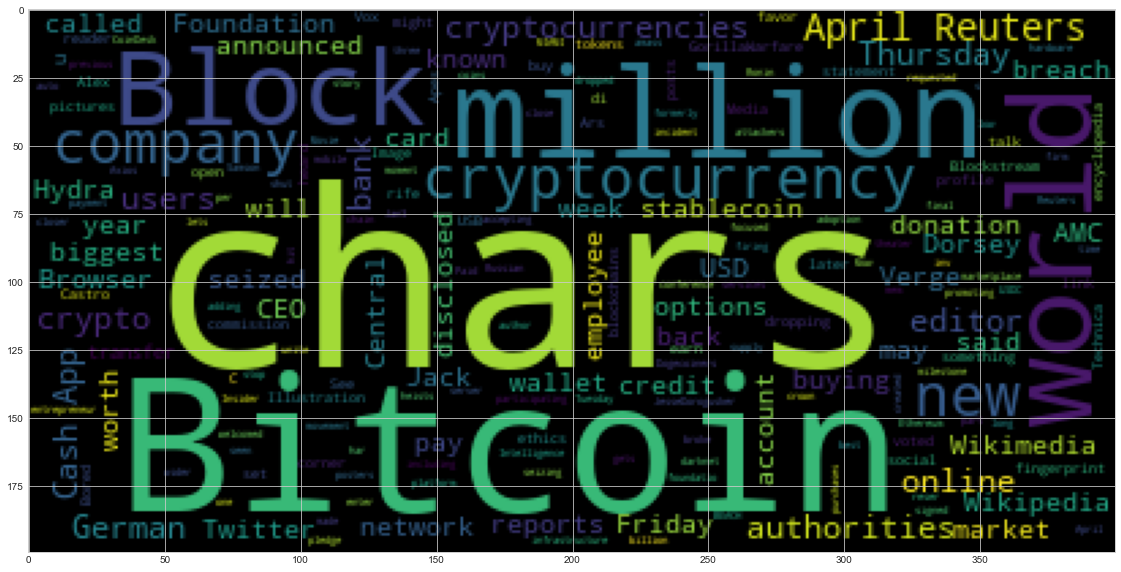

In [22]:
# Generate the Bitcoin word cloud
wc_btc = WordCloud().generate(big_string_btc)
plt.imshow(wc_btc)

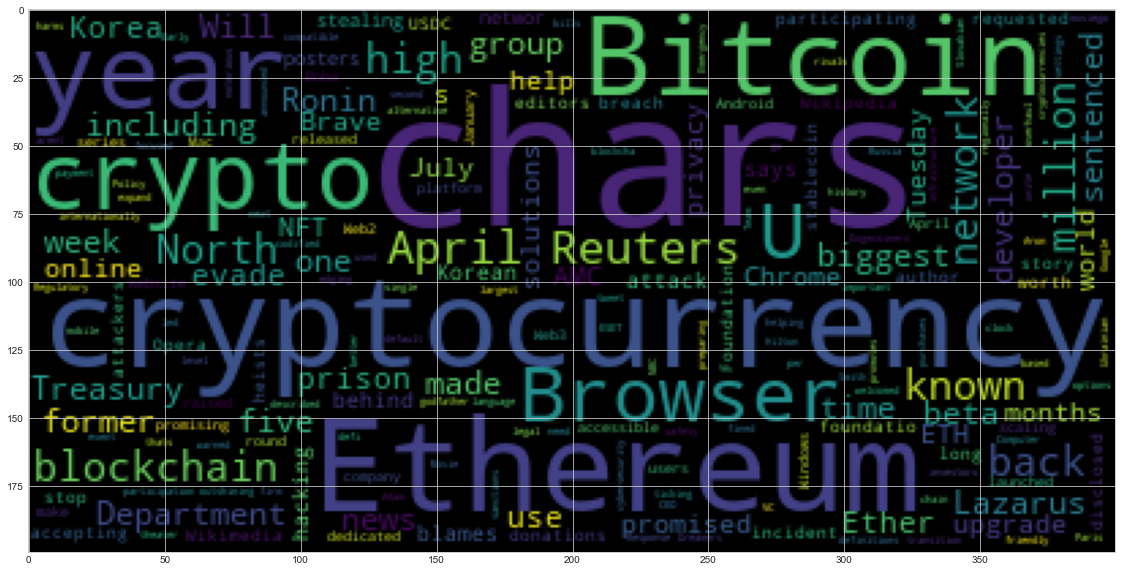

In [23]:
# Generate the Ethereum word cloud
wc_eth = WordCloud().generate(big_string_eth)
plt.imshow(wc_eth)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
bitcoin_text = (big_string_btc)

In [28]:
# Run the NER processor on all of the text
doc_btc = nlp(bitcoin_text)

# Add a title to the document
doc_btc.user_data["NER Visualization - Bitcoin"] = "NER Visualization - Bitcoin"

In [29]:
# Render the visualization
displacy.render(doc_btc, style='ent')

In [30]:
# List all Entities
for ent in doc_btc.ents:
    print(ent.text)

later this year
Verge
Vox
Alex Castro
Blockstream
the Wikimedia Foundation's
Ars Technica
GorillaWarfare
Twitter
Twitter
Jack Dorsey’s
$25.2 million
USD
Bitcoin
German
Russian
Hydra
23 million
Friday
Axios
19 million
chars]April 12
Reuters
$10 billion
chars]MIAMI BEACH
April 7
Reuters
Samson Mow
Thursday
Jan3
Block
Jack Dorsey
three
Thursday
CoinDesk
Cash App
15
More than 200
Wikipedia
the Wikimedia Foundation
chars]This week
$540 million
Ethereum
USDC
one
chars]April 26
Reuters
5.1%
38,391.36
Tuesday
2,229.82
16%
year
AMC
April 15
AMC
Adam Aron
Crypto Browser
January
Windows, Mac
Android
this week
German
US
Hydra Market
today
8.2 million
SEC
December 10th
chars]The Central African Republic
second
El Salvador
Wednesday
Faustin Archange
Touadera
April 29
Reuters
The Swiss National Bank
Thomas Jordan
annual
Friday
chars]LONDON
March 31
Reuters
European Union
Thursday


---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
ethereum_text = (big_string_eth)

In [32]:
# Run the NER processor on all of the text
doc_eth = nlp(ethereum_text)

# Add a title to the document
doc_eth.user_data["NER Visualization - Ethereum"] = "NER Visualization - Ethereum"

In [33]:
# Render the visualization
displacy.render(doc_eth, style='ent')

In [34]:
# List all Entities
for ent in doc_eth.ents:
    print(ent.text)

The US Department of Treasury
The US Treasury Department
North Korean
$625 million
Ronin
15
More than 200
Wikipedia
the Wikimedia Foundation
chars]This week
$540 million
Ethereum
USDC
one
Crypto Browser
January
Windows, Mac
Android
chars]April 5
Reuters
Boba Network
$45 million
Will Smith
Dreamers VC
Paris Hilton
Ethereum
more than five years
100,000
North Korea
US
NBC News
chars]April 26
Reuters
No.2
second
chars]The Brave Browser
Chrome
Brave
AMC
April 15
AMC
Adam Aron
this week
the Ukrainian Computer Emergency Response Team
Slovakian
Russia
Ethereum
Merge
a few months after June
first
a year and a half ago
The Order Flow
Dan Robinson
Georgios Konstantopoulos'
August 20
26
Reuters
5.1%
38,391.36
Tuesday
2,229.82
16%
year
the past few years
NFT
$25 billion
chars]April 12
Reuters
five years and three months
Tuesday
North Korea
U.S.
Aparna Chennapragada
Miami
Transform 2022
July 19 and virtually
July 20 - 28
today
Ethereum


---